In [3]:
import numpy as np
from scipy.optimize import fsolve

ep = 0.1        # epsilon value
xguess = 1.1    # Initial guess of root

f = lambda x: ep*x**3 - x + 1
xsol = fsolve(f, xguess)
print("Solved root at x = ", xsol)

Solved root at x =  [1.15346731]


Text(0, 0.5, 'y(t)')

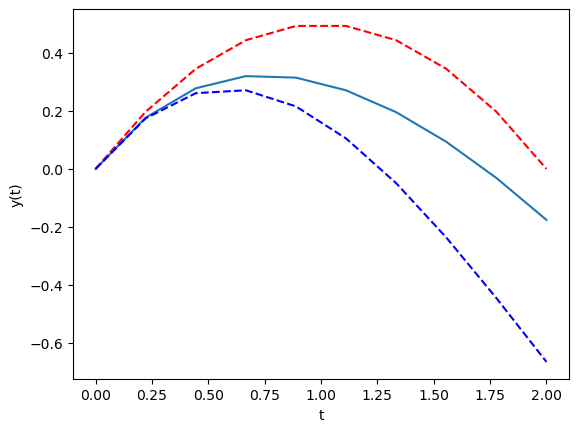

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

ep = 0.2 # epsilon value
tmax = 2 # max time
t = np.linspace(0, tmax, 10) # mesh used for plotting
alpha = 1

# Define function for the ODE
def f(t, Y):
    ep = 0.2
    alpha = 1
    y, yp = Y
    ypp = -1/(1 + ep*y)**2 - (alpha/(1 + ep*y))*yp
    return [yp, ypp]

# define the initial condition
Y0 = [0, 1]

sol = solve_ivp(f, [0, tmax], Y0, dense_output=True)

# Prior to plotting, re-interpolate solution on a fine grid
yy = sol.sol(t)
# Asymptotic solutions
y0 = -1/2*t**2 + t
y1 = alpha*(1/6)*(-3*t**2 + t**3)

# Plot it all
plt.plot(t, yy[0,])
plt.plot(t, y0, '--', color = 'red')
plt.plot(t, y0 + y1, '--', color = 'blue')
plt.xlabel('t')
plt.ylabel('y(t)')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

# There is a warning that is outputted due to converting numpy arrays 
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [23]:
def myode(z, Y, ep):
    T, Tp = Y
    Tpp = -1/ep*(2*Tp + T)
    return [Tp, Tpp]

def myF(a, ep):
    Y0 = [0, a]
    fwd = lambda z, Y: myode(z, Y, ep)
    sol = solve_ivp(fwd, [0, 1], Y0, dense_output=True)
    
    # Value at the right endpoint
    T1 = sol.y[0,-1]
    F = T1 - 1
    return F

# We create a function to solve and plot the ODE given a value of 'a'. It also returns the solution structure so we can plot it again
def solveODE(a, ep):    
    fwd = lambda z, Y: myode(z, Y, ep)
    sol = solve_ivp(fwd, [0, 1], [0, a], dense_output=True)
    # Re-interpolate and plot
    t = np.linspace(0, 1, 500)
    Y = sol.sol(t)
    plt.plot(t, Y[0])
    plt.grid(True)
    return sol, t, Y

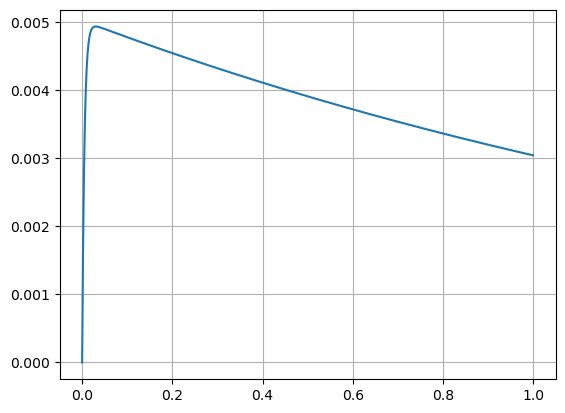

In [24]:
# Let's test the ODE solution
a = 1
ep = 0.01
sol = solveODE(a, ep)

The solution converged.
We found that F'(0) = a =  15.165375724740048
Maxima for ep =  0.2  found at (z, y) =  0.3226452905811623 ,  1.3501427227816538


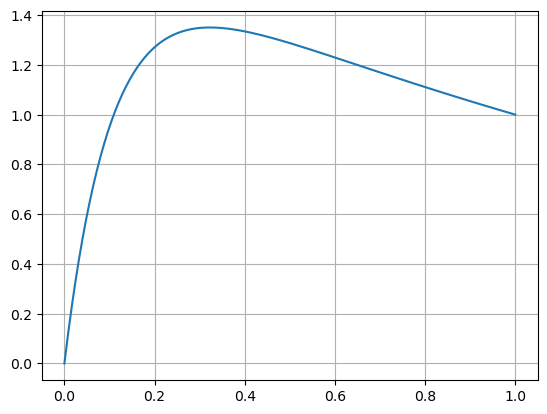

In [25]:
ep = 0.2
fwd = lambda a: myF(a, ep); # Create an auxiliary function to pass the value of epsilon first
sol = root(fwd, 1)
asol = sol.x[0]
print(sol.message)
print("We found that F'(0) = a = ", asol)

# Solve it now with the discovered value
solODE, z, Y = solveODE(asol, ep)

# Find the maxima index
ind = np.argmax(Y[0])
zmax = z[ind]
ymax = Y[0, ind]

# Print and plot the maxima
print("Maxima for ep = ", ep, " found at (z, y) = ", zmax, ", ", ymax)

# plt.plot(zmax, ymax, 'ro')

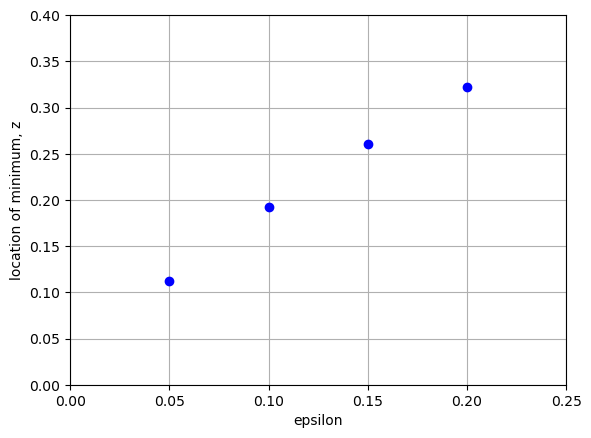

In [26]:
ep = np.array([0.05, 0.1, 0.15, 0.2])
zm = np.array([0.1122, 0.1924, 0.2605, 0.3226])
plt.plot(ep, zm, 'bo');
plt.xlabel('epsilon');
plt.ylabel('location of minimum, z');
plt.xlim([0,0.25])
plt.ylim([0,0.4])
plt.grid(1)